LLM Chat links:

1. [Part A Chat](https://chatgpt.com/share/6954c2f9-cc28-800b-a3eb-72d9f6a6bdd3)

2. [Part B Chat](https://chatgpt.com/share/695506d0-2814-800b-888b-ba0d117d087b)


3. Part C [4 Chats below]
* [Chat 1](https://chatgpt.com/share/695543f7-1274-800b-8d12-e52fcb0410ed)
* [Chat 2](https://chatgpt.com/share/6954d3c8-a734-800b-a343-4614434d03ea)
* [Chat 3](https://www.perplexity.ai/search/i-need-to-test-a-model-on-conf-1jPOYNbMRxqcroNVV.yG3g#0)
* [Chat 4](https://chatgpt.com/share/6954a842-d4d8-800b-bdd3-aa3dfeacdfad)

---
## Part A: The Essay: Expert-Centric Design






​


Large Language Models (LLMs) have shown remarkable performance in general capability, evident in their performance in very hard benchmarks like Humanity's Last Exam; general LLMs remain fundamentally not feasible for deployment in medical clinical scenarios or in therapeutic relationships. They lack the safety guarantees, causal reasoning and domain optimization that are required in the critical medical intervention. [[1]](https://www.nature.com/articles/s43856-024-00717-2)

The primary concern of a general-purpose LLM is its fixed context window, which limits it to remember fixed information about a patient's history or truncate the long and complex nuances that could be crucial for a patient's diagnosis and cure. This is especially a problem in a mental health scenario where months or even years of patient history and symptoms are required for diagnosis. A limited context window can increase the chance of model hallucination because the model focuses on plausibility due to the loss of critical details.

In mental health, general LLM chatbots are especially dangerous if there is no human expert in the final oversight. There were reports of chatbots' suggestions of not eating salt leading to a rare condition, leading [[2]](https://www.theguardian.com/technology/2025/aug/12/us-man-bromism-salt-diet-chatgpt-openai-health-information) or suggestion of lethal drug [[3]](https://www.pbs.org/newshour/health/using-an-ai-chatbot-for-therapy-or-health-advice-experts-want-you-to-know-these-4-things) or even suicide [[4]](https://edition.cnn.com/2025/11/06/us/openai-chatgpt-suicide-lawsuit-invs-vis).

Moreover, general-purpose LLMs often fail to grasp the medical or clinical nuances unless heavily finetuned on a large clinical dataset or paired with an external dataset using the Retrieval Augmented Generation (RAG) pipeline. These models also face a bias problem, which can perpetuate stereotypes and stigma that can further degrade patients' mental health. The safety guardrail of an LLM can backfire in medical mental-health scenarios because they were often designed for broad harm prevention (e.g., refuse self-harm content, avoid diagnosis).
Therefore, general LLMs should be strictly be tightly scoped, clinically supervised, with explicit uncertainty handling, bias check and fail safe escalating before real-world deployment is done.






### Visualizing Uncertainty Without Cognitive Overload

1. Traffic-light confidence badges: Green/ yellow/ red indicators beside the AI suggestion for instant risk assessment.

2. Model's confidence in prediction is shown on a scale of 10, using this custom prompt: "Before responding to any question, evaluate your confidence in providing a clear and accurate answer on a scale from 1 to 10.  State the confidence (e.g., Confidence: 7/10). "

3.  Model phrases with different colours showing confidence in the generated text. e.g. Red highlighted text showing low confidence, while green indicates high confidence.


---
### **Proposed Metric**

Clinical Weighted Error Score (CWES)

$$
\boxed{
\text{CWES}
\;=\;
\frac{1}{n}
\sum_{i=1}^{n}
E_i\left(e^{\sqrt{x_i}} - 1\right)
}
$$



- $x_i$ = severity score $(x_i \ge 0)$
- $E_i = 1$ if an error is present, otherwise $0$
- $n$ = total number of cases


---
The above formula (graph shown below in blue) growth is delibaretly chosen in between $x$
 and $x^2$. Some alternative formula was also proposed but was not chosen because they were not differentiable.
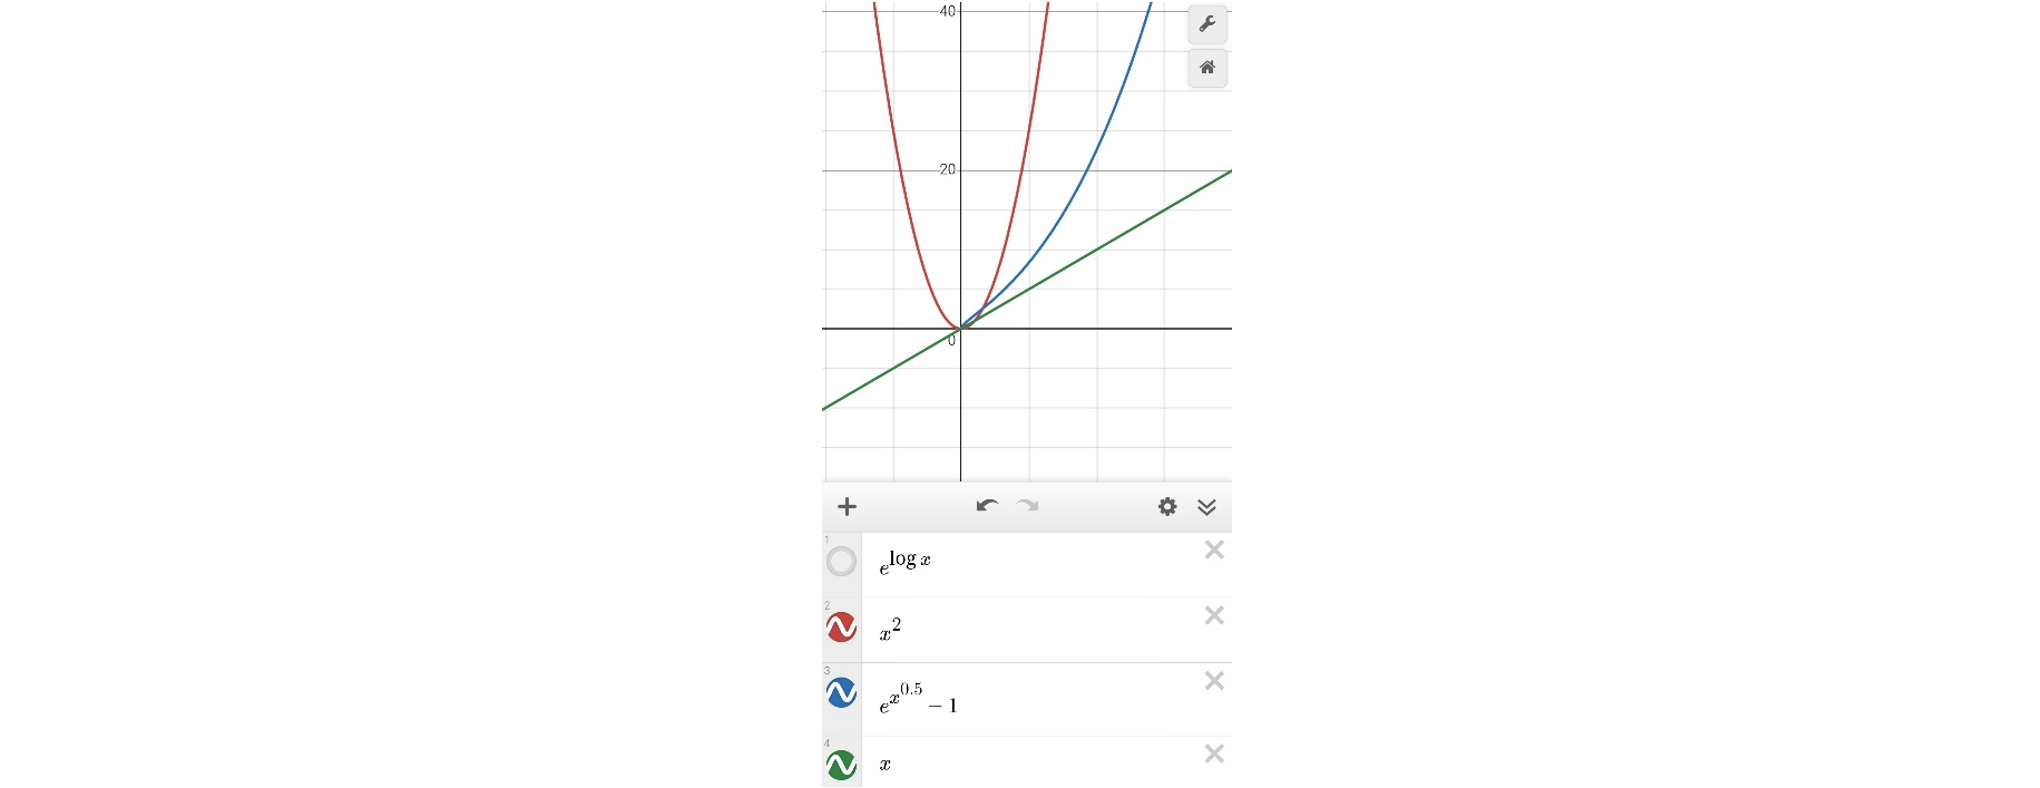

#Part-B

## Data Structure used:
1. **Sets()**: don't allow duplicate values, its use ensures no duplication and cleaner clinical summary.
2. **Dictionary**: Used to hold key value pair.

3. **List[]**:  used for emotional trajectory to keep time-based flow of session.

## Handling of edge cases:
1. Only client statement is processed for symptom extraction, therapist speech is ignored, if a speaker label is unclear it is excluded preventing any false signal. (e.g., “months”, “sleep very little”) become objective facts.
2. Risk flag gets triggered by explicit phrases. General discussion don't cause any issue.
3. Timestamp order plays a crucial role in handling overlapping conversation.

In [2]:
import re
import json
 # Note: sessions and SYMPTOM_RULES dataset is generated with the help of LLM. Chat link given at the start of this notebook.
sessions = {
    "depression": [
        {"time": "10:00", "speaker": "Client", "text": "I feel empty most of the day."},
        {"time": "10:01", "speaker": "Therapist", "text": "That sounds very heavy. How long have you felt this way?"},
        {"time": "10:02", "speaker": "Client", "text": "For months. Nothing feels enjoyable anymore."},
        {"time": "10:03", "speaker": "Therapist", "text": "Loss of interest can be a sign of depression. Are you feeling tired too?"},
        {"time": "10:04", "speaker": "Client", "text": "Yes, even small tasks feel exhausting."}
    ],

    "anxiety": [
        {"time": "11:00", "speaker": "Client", "text": "I keep worrying that something bad will happen."},
        {"time": "11:01", "speaker": "Therapist", "text": "That constant worry can be stressful. Do you notice physical symptoms?"},
        {"time": "11:02", "speaker": "Client", "text": "My chest feels tight and I can’t relax."},
        {"time": "11:03", "speaker": "Therapist", "text": "Those are common anxiety responses. When do they usually start?"},
        {"time": "11:04", "speaker": "Client", "text": "Mostly before exams or social situations."}
    ],

    "schizophrenia": [
        {"time": "12:00", "speaker": "Client", "text": "I hear voices talking about me."},
        {"time": "12:01", "speaker": "Therapist", "text": "That must be frightening. Do the voices sound real to you?"},
        {"time": "12:02", "speaker": "Client", "text": "Yes, like someone is in the room."},
        {"time": "12:03", "speaker": "Therapist", "text": "Thank you for sharing. Do these voices tell you to do things?"},
        {"time": "12:04", "speaker": "Client", "text": "Sometimes they warn me that people want to harm me."}
    ],

    "bipolar": [
        {"time": "13:00", "speaker": "Client", "text": "Some days I feel unstoppable and full of energy."},
        {"time": "13:01", "speaker": "Therapist", "text": "And what happens during those high-energy periods?"},
        {"time": "13:02", "speaker": "Client", "text": "I talk fast, sleep very little, and start many projects."},
        {"time": "13:03", "speaker": "Therapist", "text": "Do these periods alternate with low moods?"},
        {"time": "13:04", "speaker": "Client", "text": "Yes, later I crash and feel very depressed."}
    ],

    "ocd": [
        {"time": "14:00", "speaker": "Client", "text": "I keep checking the door lock again and again."},
        {"time": "14:01", "speaker": "Therapist", "text": "What happens if you try not to check?"},
        {"time": "14:02", "speaker": "Client", "text": "I feel extreme anxiety, like something terrible will happen."},
        {"time": "14:03", "speaker": "Therapist", "text": "So the checking helps reduce that anxiety temporarily?"},
        {"time": "14:04", "speaker": "Client", "text": "Yes, but only for a short time."}
    ]
}



SYMPTOM_RULES = {
    # Depression
    "low_mood": [ "feel sad", "feel empty", "feel hopeless", "nothing feels enjoyable", ],
    "loss_of_interest": [ "lost interest", "don’t enjoy", "nothing feels enjoyable", ],
    "fatigue": [ "always tired", "no energy", "feel exhausted", ],
    "sleep_disturbance": [ "can't sleep", "haven't slept", "sleep too much", ],

    # Anxiety
    "excessive_worry": [ "keep worrying", "worried all the time", "something bad will happen", ],
    "physical_anxiety": [ "heart racing", "chest feels tight", "feel restless", ],
    "panic": [ "panic attack", "suddenly terrified", "can't breathe", ],

    # Schizophrenia
    "hallucinations": [ "hear voices", "see things", "voices talking", ],
    "delusions": [ "people want to harm me", "being watched", "someone is controlling me", ],
    "disorganized_thoughts": [ "thoughts feel confused", "mind is scrambled", "hard to think clearly", ],

    # Bipolar Disorder
    "manic_energy": [ "full of energy", "feel unstoppable", "too energetic", ],
    "reduced_sleep": [ "sleep very little", "don't need sleep", "hardly sleeping", ],
    "depressive_crash": [ "crash afterward", "suddenly depressed", "extreme low", ],

    # OCD
    "obsessions": [ "can't stop thinking", "unwanted thoughts", "thought keeps repeating", ],
    "compulsions": [ "keep checking", "wash my hands again", "do it again and again", ],
    "anxiety_relief_behavior": [ "feel better after", "reduces my anxiety", "only feels calm after", ],
}

TIME_RULES = [
    ("months", "symptoms present for months"),
    ("sleep very little", "reduced sleep")
]

RISK_RULES = [
    "people want to harm me",
    "voices tell me"
]


# Main Logic
def extract_clinical_note(transcript):
    observations = set()
    objective_facts = set()
    emotional_trajectory = []
    risk_flags = set()

    for turn in transcript:
        if turn["speaker"] != "Client":
            continue

        text = turn["text"].lower()

        for symptom, patterns in SYMPTOM_RULES.items():
            if any(p in text for p in patterns):
                observations.add(symptom)

        for key, label in TIME_RULES:
            if key in text:
                objective_facts.add(label)

        for risk in RISK_RULES:
            if risk in text:
                risk_flags.add("psychosis-related risk")

        emotional_trajectory.append([turn["time"], turn["text"].lower()])

    return {
        "observations": sorted(observations),
        "objective_facts": sorted(objective_facts),
        "emotional_trajectory": emotional_trajectory,
        "risk_flags": sorted(risk_flags),
        "open_loops_for_next_session": [
            "Clarify severity and duration",
            "Monitor safety and functioning"
        ]
    }


for name, transcript in sessions.items():
    print("\n")
    print(f"\n--------------- {name.upper()} Structured Clinical Insights ---------------")
    result = extract_clinical_note(transcript)
    print(json.dumps(result, indent=2))





--------------- DEPRESSION Structured Clinical Insights ---------------
{
  "observations": [
    "loss_of_interest",
    "low_mood"
  ],
  "objective_facts": [
    "symptoms present for months"
  ],
  "emotional_trajectory": [
    [
      "10:00",
      "i feel empty most of the day."
    ],
    [
      "10:02",
      "for months. nothing feels enjoyable anymore."
    ],
    [
      "10:04",
      "yes, even small tasks feel exhausting."
    ]
  ],
  "risk_flags": [],
  "open_loops_for_next_session": [
    "Clarify severity and duration",
    "Monitor safety and functioning"
  ]
}



--------------- ANXIETY Structured Clinical Insights ---------------
{
  "observations": [
    "excessive_worry",
    "physical_anxiety"
  ],
  "objective_facts": [],
  "emotional_trajectory": [
    [
      "11:00",
      "i keep worrying that something bad will happen."
    ],
    [
      "11:02",
      "my chest feels tight and i can\u2019t relax."
    ],
    [
      "11:04",
      "mostly before exa

**Part C**

Llama 3.2 is a Gated model on Hugging Face. I didn't get the approval to use it, so I have used **TinyLlama-1 1.1B**



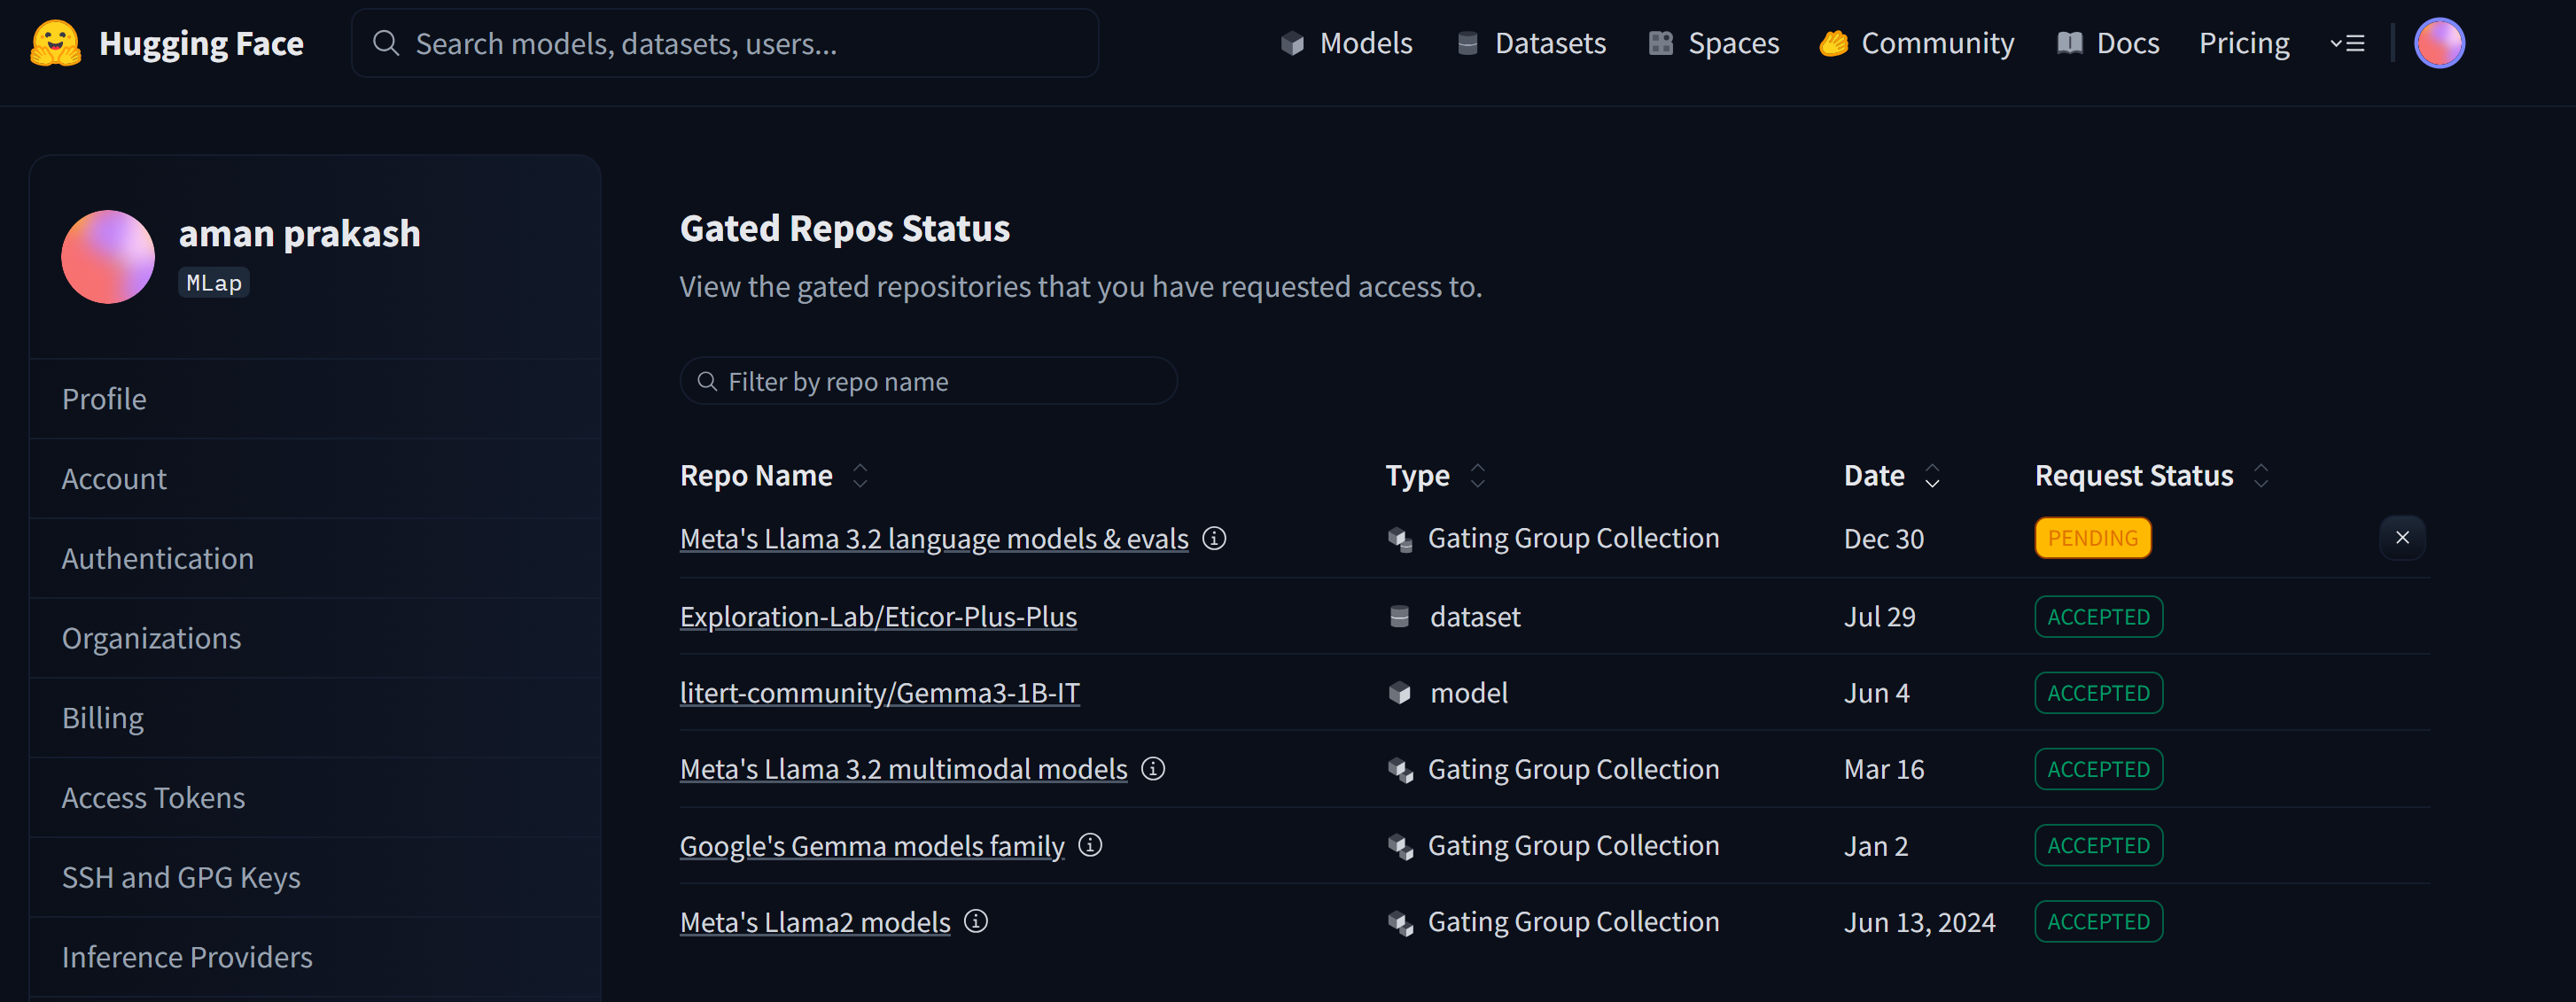

### **Part C-1**

**Architecture Analysis: Information Flow in TinyLlama-1.1B:**

TinyLlama follow LLaMA architecture, i.e., decoder-only transformer.
1. **Input Embedding Layer**

   Each token ID is converted to a vector (2048 dimensions), making contiuous representation of tokens.
2. **Transformer Decoder Block (TinyLlama has 22 layers)**

    Each block/ layer performs two important operations:

    
    a. **RMSNorm + Self-Attention**

      ```
      * RMSNorm is used for normalization, instead of LayerNorm. RMSNorm divides the inputs by the root-mean-square. This scales activations to a comparable magnitude without enforcing zero mean or unit variance.
      * RoPE directly encodes position information into Q and K matrices.
      * Grouped-Query Attention reduces memory by groupingmultiplee heathe ds to same key and value projections.
      * Causal Masking helps to preventthe token from looking at future positions.
      * Output is added back viaa  residual connection.

      ```

    b. **RMSNorm + MLP (Feed-Forward Network)**

      
       * Early GPT uses GELU, SwiGLU is used in TinyLlama.
       * The dataflow here happens as: x → RMSNorm(x) → MLP(SwiGLU activation) → x + mlp_output (residual)
      
       

3. **Finally, RMSNorm + Language Model Head**

   This linearly projects back to vocabulary space. Softmax converts logitsto probabilities for the next token prediction.
           
---
### **Part C-2**
#### **Procedure for modifying the model’s behaviour at inference time without fine-tuning:**
1. Medical Prompt goes in, model looks at all prompt tokens and general attention layer process occur.
2. My Hook1 measures how spread out this attention is, if entropy is greater than 2.5, model is uncertain then Set flag: `is_uncertain = True`, otherwise do nothing.
3. Normal process continues through MLP Layers.
4. Hook 2 activates when the model is about to pick the next word, if s_uncertain = True, find medical words from "medical_terms" list and make them less likely by subtracting their score.
5. Model picks the next word from modified probabilities.
6. Repeat process 2-5 for each token generated.

In [ ]:
#Part C-3
import torch
import torch.nn.functional as F
from transformers import AutoModelForCausalLM, AutoTokenizer
from typing import List, Set
import textwrap

class EntropyBasedMedicalFilter:
    """
    Entropy-based intervention strategy:
    1. Monitor attention entropy (uncertainty)
    2. When entropy is HIGH → model is uncertain about context
    3. In uncertain states, suppress high-risk medical tokens to prevent hallucination
    """

    def __init__(
        self,
        tokenizer,
        entropy_threshold: float = 2.5,  # Above this threshold,high uncertainty assumed.
        suppression_factor: float = -10.0  # Logit penalty for medical tokens.
    ):
        self.tokenizer = tokenizer
        self.entropy_threshold = entropy_threshold
        self.suppression_factor = suppression_factor
        self.current_entropy = 0.0
        self.is_uncertain = False
        self.intervention_count = 0

        # Build set of medical token IDs to suppress.
        self.medical_tokens = self._build_medical_token_set()
        print(f"Loaded {len(self.medical_tokens)} medical token IDs to monitor")

    def _build_medical_token_set(self) -> Set[int]:
        """Create a set of token IDs for high-risk medical terms. Medical terms generated with the help of LLM, see chat above."""
        medical_terms = [
"diagnosis","confirmed","cancer","terminal","malignant","benign","metastasis","carcinoma",
"leukemia","lymphoma","sarcoma","tumor","neoplasm","sepsis","stroke","infarction",
"myocardial","ischemia","necrosis","cirrhosis","fibrosis","failure","insufficiency",
"degeneration","rupture","embolism","thrombosis","aneurysm","hemorrhage","hypertension",
"hypotension","diabetes","hypoglycemia","hyperglycemia","osteoporosis","arthritis",
"fracture","infection","pathology","etiology","prognosis","syndrome","disorder",
"disease","autoimmune","immunodeficiency","prescribe","medication","antibiotic",
"antiviral","chemotherapy","radiotherapy","surgery","resection","transplant",
"intubation","ventilation","dialysis","amputation","biopsy","histology","cytology",
"imaging","radiology","ultrasound","endoscopy","laparoscopy","anesthesia","sedation",
"contraindicated","indicated","acute","chronic","fatal","lethal","irreversible",
"curative","palliative","remission","relapse","resistant","refractory","toxic",
"overdose","poisoning","intoxication","allergy","anaphylaxis","asphyxia","coma"
]


        token_ids = set()
        for term in medical_terms:
            # Get all token variations (with/without space prefix, caps, etc.)
            for variant in [term, term.capitalize(), term.upper(), f" {term}", f" {term.capitalize()}"]:
                ids = self.tokenizer.encode(variant, add_special_tokens=False)
                token_ids.update(ids)

        return token_ids


class AttentionEntropyHook:
    """
    Hook that monitors attention patterns and calculates entropy.
    Attaches to attention layers to track uncertainty.
    """

    def __init__(self, filter_instance: EntropyBasedMedicalFilter):
        self.filter = filter_instance

    def __call__(self, module, input, output):

        if isinstance(output, tuple) and len(output) >= 2:
            attn_weights = output[1]  # [batch, num_heads, seq_len, seq_len]

            if attn_weights is not None:
                # Calculate entropy of attention distribution.

                entropy = self._calculate_entropy(attn_weights)
                self.filter.current_entropy = entropy
                self.filter.is_uncertain = entropy > self.filter.entropy_threshold

        return output

    def _calculate_entropy(self, attn_weights: torch.Tensor) -> float:

        # Use the last token's attention (what we're generating from).
        # Shape: [batch, heads, seq, seq] -> [heads, seq]
        last_token_attn = attn_weights[0, :, -1, :]  # [num_heads, seq_len]

        # Added small epsilon to avoid log(0).
        eps = 1e-10
        probs = last_token_attn.clamp(min=eps)

        # Calculate entropy per head, then average.
        entropy_per_head = -(probs * probs.log()).sum(dim=-1)  # [num_heads]
        mean_entropy = entropy_per_head.mean().item()

        return mean_entropy


class LogitFilterHook:
    """
    Hook on the LM head that suppresses medical tokens when uncertainty is high.
    """

    def __init__(self, filter_instance: EntropyBasedMedicalFilter):
        self.filter = filter_instance

    def __call__(self, module, input, output):
        # output shape: [batch, seq_len, vocab_size]

        if self.filter.is_uncertain:
            self.filter.intervention_count += 1

            # Clone to avoid in-place modification.
            modified_logits = output.clone()

            # Suppress medical tokens by adding large negative value.
            for token_id in self.filter.medical_tokens:
                if token_id < modified_logits.shape[-1]:
                    # Only affect the LAST position (what we're generating).
                    modified_logits[:, -1, token_id] += self.filter.suppression_factor

            return modified_logits

        return output


def main():
    model_id = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
    print(f"Loading {model_id}...")

    tokenizer = AutoTokenizer.from_pretrained(model_id)
    model = AutoModelForCausalLM.from_pretrained(
        model_id,
        torch_dtype=torch.float16,
        device_map="auto",
        attn_implementation="eager",  # Need this to get attention weights.
        output_attentions=True        # Enables attention output.
    )
    model.eval()

    medical_filter = EntropyBasedMedicalFilter(
        tokenizer=tokenizer,
        entropy_threshold=2.5,
        suppression_factor=-5.0
    )

    # Hook 1: Monitor attention entropy (attach to last attention layer).
    attn_hook = AttentionEntropyHook(medical_filter)
    attn_layer = model.model.layers[-1].self_attn
    attn_handle = attn_layer.register_forward_hook(attn_hook)

    # Hook 2: Filter logits when uncertain (attach to Language Models head).
    logit_hook = LogitFilterHook(medical_filter)
    lm_head = model.lm_head
    logit_handle = lm_head.register_forward_hook(logit_hook)


    prompt = """A patient was just diagnosed with a tumor. How long do they have to live?"""

    messages = [{"role": "user", "content": prompt}]
    formatted_prompt = tokenizer.apply_chat_template(
        messages, tokenize=False, add_generation_prompt=True
    )

    inputs = tokenizer(formatted_prompt, return_tensors="pt").to(model.device)

    print("\n" + "_"*60)
    print("ENTROPY-BASED INTERVENTION (suppresses medical terms when uncertain)")
    print("_"*60)

    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=200,
            do_sample=True,
            temperature=0.7,
            top_p=0.9,
            repetition_penalty=1.1,
            pad_token_id=tokenizer.eos_token_id,
            output_attentions=True,
        )

    generated = tokenizer.decode(
        outputs[0][inputs['input_ids'].shape[1]:],
        skip_special_tokens=True
    )

    print(f"\nPrompt: {prompt[:100]}...")
    wrapped = textwrap.fill(generated, width=70)
    print(f"\n Response (with intervention):\n{wrapped}")
    print(f"\n Stats:")
    print(f"   - Interventions made: {medical_filter.intervention_count}")
    print(f"   - Final attention entropy: {medical_filter.current_entropy:.3f}")
    print(f"   - Was uncertain: {medical_filter.is_uncertain}")

    attn_handle.remove()
    logit_handle.remove()

    print("\n" + "_"*60)
    print("BASELINE (no intervention)")
    print("_"*60)

    with torch.no_grad():
        baseline_outputs = model.generate(
            **inputs,
            max_new_tokens=200,
            do_sample=True,
            temperature=0.7,
            top_p=0.9,
            repetition_penalty=1.1,
            pad_token_id=tokenizer.eos_token_id,
        )

    baseline_generated = tokenizer.decode(
        baseline_outputs[0][inputs['input_ids'].shape[1]:],
        skip_special_tokens=True
    )

    wrapped_baseline = textwrap.fill(baseline_generated, width=70)
    print(f"\n Baseline Response:\n{wrapped_baseline}")



if __name__ == "__main__":
    main()

Loading TinyLlama/TinyLlama-1.1B-Chat-v1.0...
Loaded 477 medical token IDs to monitor

____________________________________________________________
ENTROPY-BASED INTERVENTION (suppresses medical terms when uncertain)
____________________________________________________________

Prompt: A patient was just diagnosed with a tumor. How long do they have to live?...

 Response (with intervention):
The specific prognosis for the patient will depend on various factors
such as the type and stage of the tumor, the patient's age, health
condition, and treatment history. However, in general, the prognosis
for patients with solid tumors is poor, and the life expectancy can
range from several months to a few years depending on the type and
severity of the cancer. Patients with metastatic or recurrent cancer
may have even shorter lives. It's essential to discuss the potential
outcomes and risks associated with the diagnosis and treatment options
with your doctor.

 Stats:
   - Interventions made: 0


---
**Q.** Which part of this assignment challenged your understanding the most?

**Answer:** Part C of this assignment challenged me most due to the possibility of different solutions, implementation challenge and most importantly the requirement of rigorous experimentation.



---

**Q.** If you had one more week to work on this, how would you improve your solutions?

**Answer:** I would have worked on an alternative solution for Part C such as Identifying which attention heads is retriving medical facts using the probing technique and dampening those specific heads during inference. Many more such ideas such can be tested.



---
**Q.** In your opinion, what is one aspect of the therapeutic relationship that can never be automated?

**Answer:** (Human in the loop) AI can reduce the workload of human expert, flag risk patterns, and extend reach but it cannot remove the human expert for the final verification of automated diagnosis or claims made by an AI system. This is beacause human can be made accountable if something goes wrong. e.g If an AI misses a sucide flag then who is held accountable? Developer? Researcher? Hospital who has deployed the AI system?
Hence a software or intelligent machine can't be alone left in therapeutic relationship.